In [51]:
from keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np
import keras

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [95]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [213]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(6, activation='tanh', input_shape=(10000,))),
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [214]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [215]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [216]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [217]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 23ms/step - loss: 0.5260 - acc: 0.7913 - val_loss: 0.4373 - val_acc: 0.8573
Epoch 2/4
30/30 [==============================] - 0s 14ms/step - loss: 0.3724 - acc: 0.8903 - val_loss: 0.3653 - val_acc: 0.8760
Epoch 3/4
30/30 [==============================] - 0s 14ms/step - loss: 0.3017 - acc: 0.9123 - val_loss: 0.3254 - val_acc: 0.8863
Epoch 4/4
30/30 [==============================] - 0s 14ms/step - loss: 0.2560 - acc: 0.9274 - val_loss: 0.3051 - val_acc: 0.8884


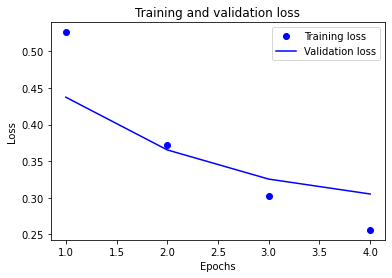

In [218]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

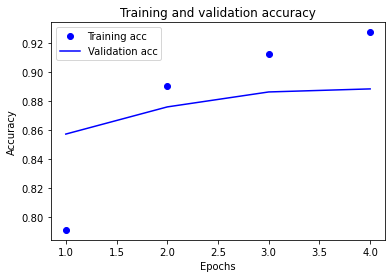

In [219]:
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [220]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3218 - acc: 0.8785


[0.32184654474258423, 0.8785200119018555]